In [1]:
from Lib.myModules.my_ML_Modules_1 import *
import math
import sys
import contextlib

In [2]:
# Read all data
data_dir = "../data"
infantNum = 10
ECG_dataset = f"{data_dir}/infant{infantNum}_ecg"
RESP_dataset = f"{data_dir}/infant{infantNum}_resp"

signal_ecg_0 = wfdb.rdsamp(f"{data_dir}/infant{infantNum}_ecg")
signal_resp_0 = wfdb.rdsamp(f"{data_dir}/infant{infantNum}_resp")
print(f'ECG DATA: {signal_ecg_0[1]}')
print(F'RESP DATA: {signal_resp_0[1]}')
totalDuration_ECG = num2Time(num=signal_ecg_0[1]['sig_len'], fs=signal_ecg_0[1]['fs'])
print(f'{totalDuration_ECG} sec, {secs2minutes(totalDuration_ECG)} minutes, {secs2hours(totalDuration_ECG)} hours')
totalDuration_RESP = num2Time(num=signal_resp_0[1]['sig_len'], fs=signal_resp_0[1]['fs'])
print(f'{totalDuration_RESP} sec, {secs2minutes(totalDuration_RESP)} minutes, {secs2hours(totalDuration_RESP)} hours')

ECG DATA: {'fs': 500, 'sig_len': 85083254, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['I'], 'comments': []}
RESP DATA: {'fs': 50, 'sig_len': 8508154, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}
170166.508 sec, 2836.1084666666666 minutes, 47.26847444444444 hours
170163.08 sec, 2836.0513333333333 minutes, 47.26752222222222 hours


In [3]:
start_time_secs = hours2secs(10)
end_time_secs = hours2secs(16)

In [4]:
X, y = data_bin(start_time_secs=start_time_secs, 
                end_time_secs=end_time_secs, 
                signal_ecg_0=signal_ecg_0,
                signal_resp_0=signal_resp_0,
                ECG_dataset=ECG_dataset,
                RESP_dataset=RESP_dataset)

start: 18000000, end: 28800000
start: 1800000, end: 2880000
90th percentile: 0.2723584076728111, 10th percentile: -0.3985428075579208, IQR: 0.6709012152307319
Identified outliers: 382391
Data Shape: (10800000,)
90th percentile: 35.669615739677965, 10th percentile: 31.48064299424474, IQR: 4.188972745433226
Identified outliers: 27261
Data Shape: (1080000,)


In [5]:
print("******************************************************************************************************************************")
print("--------- Linear Regression ---------")
y_lr_predict = average_lr_model_predict(X=X,y=y)
print("******************************************************************************************************************************")
print("--------- Polynomial Regression ---------")
y_pr_predict = average_pr_model_predict(X=X,y=y)
print("******************************************************************************************************************************")
print("--------- Support Vector Regression ---------")
y_svr_rbf_predict = average_pr_model_predict(X=X,y=y)
print("******************************************************************************************************************************")

******************************************************************************************************************************
--------- Linear Regression ---------
../models/infant_1/lr_model_step0.25_startHrs10_endHrs12.sav
Mean absolute error: 13.91
Mean squared error: 501.52
Root mean squared error: 22.39
../models/infant_2/lr_model_step0.25_startHrs10_endHrs12.sav
Mean absolute error: 28.69
Mean squared error: 1152.01
Root mean squared error: 33.94
../models/infant_3/lr_model_step0.25_startHrs10_endHrs12.sav
Mean absolute error: 27.68
Mean squared error: 1091.23
Root mean squared error: 33.03
../models/infant_4/lr_model_step0.25_startHrs10_endHrs12.sav
Mean absolute error: 17.69
Mean squared error: 668.22
Root mean squared error: 25.85
../models/infant_5/lr_model_step0.25_startHrs10_endHrs12.sav
Mean absolute error: 14.36
Mean squared error: 519.22
Root mean squared error: 22.79
../models/infant_6/lr_model_step0.25_startHrs10_endHrs12.sav
Mean absolute error: 24.80
Mean squared er

Text(0.5, 1.0, 'Infant 10: Predict Heart Rate - Support Vector Regression')

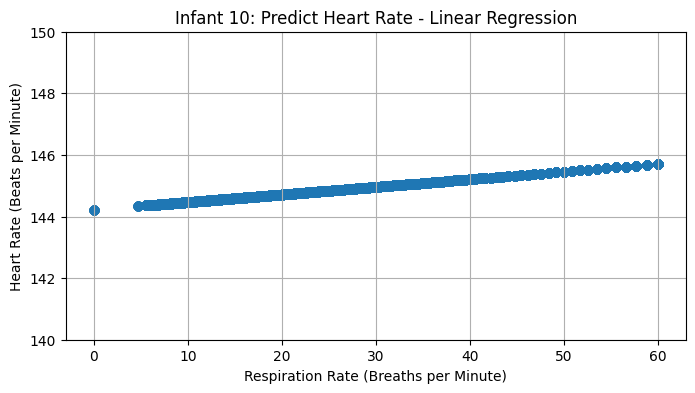

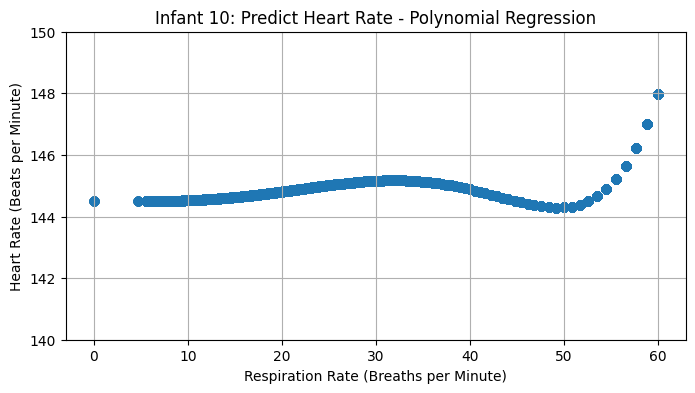

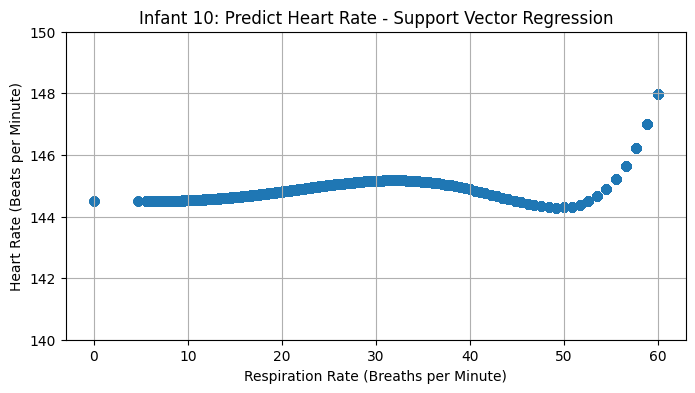

In [7]:
plt.figure(num=1, figsize=(8,4))
plt.scatter(X, y_lr_predict)
plt.ylim(140,150)
plt.grid(True)
plt.xlabel('Respiration Rate (Breaths per Minute)')
plt.ylabel('Heart Rate (Beats per Minute)')
plt.title('Infant 10: Predict Heart Rate - Linear Regression')

plt.figure(num=2, figsize=(8,4))
plt.scatter(X, y_pr_predict)
plt.ylim(140,150)
plt.grid(True)
plt.xlabel('Respiration Rate (Breaths per Minute)')
plt.ylabel('Heart Rate (Beats per Minute)')
plt.title('Infant 10: Predict Heart Rate - Polynomial Regression')

plt.figure(num=3, figsize=(8,4))
plt.scatter(X, y_svr_rbf_predict)
plt.ylim(140,150)
plt.grid(True)
plt.xlabel('Respiration Rate (Breaths per Minute)')
plt.ylabel('Heart Rate (Beats per Minute)')
plt.title('Infant 10: Predict Heart Rate - Support Vector Regression')